In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd
from statistics import mean
from scipy import signal, ndimage
import math

from scipy.optimize import curve_fit
import matplotlib.patches as ptc
from numpy.polynomial import Polynomial
from scipy.io import readsav
import os
import scipy.linalg as la
from scipy.stats import sem
from scipy import asarray as ar,exp
from functions import *


In [2]:
import scienceplots
plt.style.use(['science','notebook','grid'])

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:

name = 'inttime_131_6Mm.txt'
datContent = [i.strip().split() for i in open(name).readlines()]
datContent = datContent[5:]

t   = np.array(datContent)[:,0]
x1  = np.array(datContent)[:,1]
# e   = np.array(datContent)[:,2]

In [5]:
t_,x_=[],[]
for i in range(len(t)):
    t_.append(float(t[i]))
    x_.append(float(x1[i]))    
   
    
t_ = np.array(t_)
x_ = np.array(x_)


In [6]:
dt = t_[1] - t_[0]
fs = 1/ dt

In [7]:
x=x_[:]
t1=t_[:]

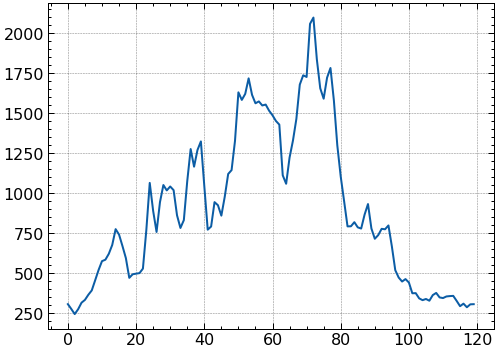

In [8]:
plt.plot(x_)

([], [])

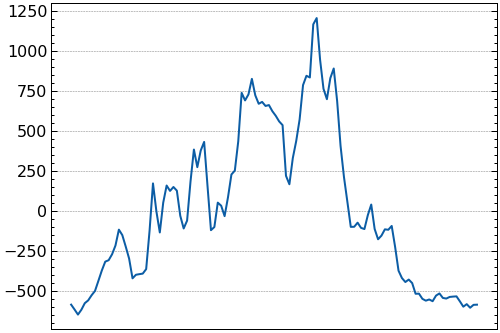

In [9]:
plt.plot(t, x - np.mean(x))
plt.xticks([])

In [10]:
# x1 = 7*np.sin(1*2*np.pi*t1) + 3*np.sin(5*2*np.pi*t1) + np.sin(9*2*np.pi*t1)

In [11]:
imfm = emd.sift.mask_sift(x)
n_imfm= len(imfm[0,:])

 Inputs samples (120) is small for specified max_imfs (9) very likely that 5 or fewer imfs are returned


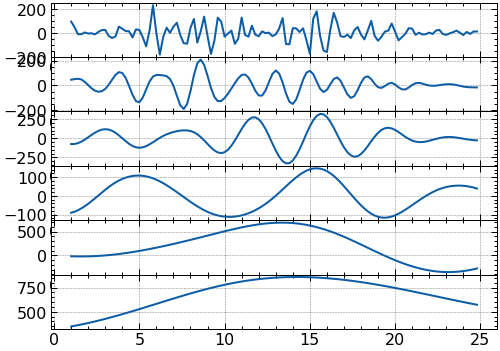

In [12]:
# plt.figure(figsize=(12,12))

for i in range(n_imfm):
    plt.subplot(n_imfm,1,i +1)
    plt.plot(t1,imfm[:,i])
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
# plt.savefig('results/'+dir_+'/imfs.png')

In [13]:
Em=[]
Pm=[]
for i in range(n_imfm-1):
    E = mean(imfm[:,i]**2)
    P = len(imfm[:,i])/bm(imfm[:,i])
    Em.append(E)
    Pm.append(P)
    
Ex=mean(x**2)
Px=2*len(x)/bm(x)

Em=np.array(Em)
Pm=np.array(Pm)


In [14]:
Pm

array([ 3.75      , 10.90909091, 20.        , 40.        , 60.        ])

754.3732259922614


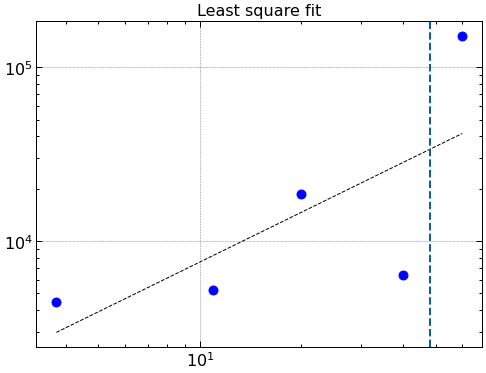

In [15]:
lf, slope, L, U = bypart(x1,Pm,Em,0,n_imfm,3.646)
plt.title('Least square fit')
plt.plot(lf[0],lf[1],'--',color='black',linewidth=1)
plt.plot((lf[0])[:],U[:],c='black',linestyle='--')
plt.plot((lf[0])[:],L[:],c='black',linestyle='--')

plt.scatter((Pm),(Em),color='blue',s=80)
print(slope)

plt.loglog()
plt.axvline(x=.4*len(x1),linestyle='--')
# plt.ylim(1e4)



In [16]:
trend = 5

In [17]:
x2 = x

[14.88705924  3.96665486]


[]

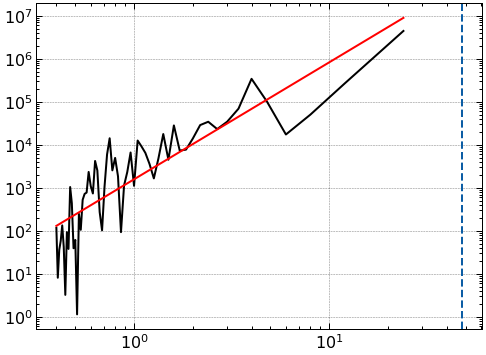

In [18]:
fxx, pxx = sp.signal.welch(x2,fs,window='boxcar', nperseg=len(x2))
non_zero_indices = fxx != 0

period = 1 / fxx[non_zero_indices]


popt, pcov = curve_fit(scaling,period, pxx[non_zero_indices])
print(popt)

sig=np.std(pxx)
prd=np.linspace(min(period),max(period),1000)

plt.plot(period,pxx[non_zero_indices],c='black')
plt.axvline(x=.4*len(x),linestyle='--')

lf=log_fit(period,pxx[non_zero_indices],prd,1)
plt.plot(lf[0],lf[1],color='red')
# plt.plot(lf[0], lf[1]*1*(sig),color='red',linestyle='--')
plt.loglog()


In [19]:
period

array([23.994144  , 11.997072  ,  7.998048  ,  5.998536  ,  4.7988288 ,
        3.999024  ,  3.42773486,  2.999268  ,  2.666016  ,  2.3994144 ,
        2.18128582,  1.999512  ,  1.84570338,  1.71386743,  1.5996096 ,
        1.499634  ,  1.41142024,  1.333008  ,  1.26284968,  1.1997072 ,
        1.14257829,  1.09064291,  1.04322365,  0.999756  ,  0.95976576,
        0.92285169,  0.888672  ,  0.85693371,  0.82738428,  0.7998048 ,
        0.77400465,  0.749817  ,  0.72709527,  0.70571012,  0.68554697,
        0.666504  ,  0.64849038,  0.63142484,  0.61523446,  0.5998536 ,
        0.58522302,  0.57128914,  0.55800335,  0.54532145,  0.5332032 ,
        0.52161183,  0.5105137 ,  0.499878  ,  0.48967641,  0.47988288,
        0.47047341,  0.46142585,  0.4527197 ,  0.444336  ,  0.43625716,
        0.42846686,  0.42094989,  0.41369214,  0.40668041,  0.3999024 ])

[]

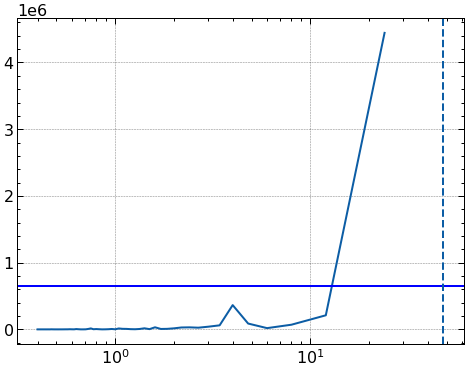

In [20]:
# plt.figure(figsize=(10,6))

fxx, pxx =sp.signal.welch(x2,fs,detrend='linear',window='boxcar', nperseg=len(x2))
plt.plot(1/fxx,pxx)
p0=.05
y0= scargle(p0,fxx,pxx)
plt.axhline(y=y0,color='blue')
plt.axvline(x=.4*len(x),linestyle='--')


plt.semilogx()
# plt.ylim(0,2*y0)
# plt.savefig('results/'+dir_+'/periodogram.png')

In [21]:
1/fxx

array([        inf, 23.994144  , 11.997072  ,  7.998048  ,  5.998536  ,
        4.7988288 ,  3.999024  ,  3.42773486,  2.999268  ,  2.666016  ,
        2.3994144 ,  2.18128582,  1.999512  ,  1.84570338,  1.71386743,
        1.5996096 ,  1.499634  ,  1.41142024,  1.333008  ,  1.26284968,
        1.1997072 ,  1.14257829,  1.09064291,  1.04322365,  0.999756  ,
        0.95976576,  0.92285169,  0.888672  ,  0.85693371,  0.82738428,
        0.7998048 ,  0.77400465,  0.749817  ,  0.72709527,  0.70571012,
        0.68554697,  0.666504  ,  0.64849038,  0.63142484,  0.61523446,
        0.5998536 ,  0.58522302,  0.57128914,  0.55800335,  0.54532145,
        0.5332032 ,  0.52161183,  0.5105137 ,  0.499878  ,  0.48967641,
        0.47988288,  0.47047341,  0.46142585,  0.4527197 ,  0.444336  ,
        0.43625716,  0.42846686,  0.42094989,  0.41369214,  0.40668041,
        0.3999024 ])

### 